In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import clear_output
import time

In [2]:
sigm = lambda x: 1/(1+np.exp(-x))

In [3]:
class Layer:
    
    def __init__(self, NC, NN, ActFunc, rate=0.1):
        
        self.NC = NC
        self.NN = NN
        self.ActFunc = ActFunc
        self.rate = rate
        

        # Weights and Biases of the layer
        self.W = np.random.uniform( -10.,10., size=(self.NC,self.NN) )
        self.b = np.random.uniform( -10.,10., size=(1,self.NN) )
        
    def Activation(self,x): # input
        z = np.dot(x,self.W) + self.b # average sum
        return self.ActFunc( z )[0]   # activation function      
    
    # No mutamos en 
    #def Mutate(self):
    
    #    self.W += np.random.normal( loc=0., scale=self.rate, size=(self.NC,self.NN))
    #    self.b += np.random.normal( loc=0., scale=self.rate, size=(1,self.NN))

In [4]:
# Creamos una red con la misma configuración del entrenamiento
l0 = Layer(2,5,sigm)
l1 = Layer(5,3,sigm)
l2 = Layer(5,2,sigm)

In [5]:
l0.b = [[ 5.4678804,  -3.16624792, -4.4382485,  -8.20623171,  9.69987255]]
l1.b = [[-11.67278187,   3.56205012,   8.70221925]]
l2.b = [[3.33446265, 6.04996944]]
l0.W = [[-0.09089465, -6.35489966, -1.13315918, 11.43356067, 7.20555635],\
        [-8.77721197,  2.67482497,  1.66138927, -1.86730663, 15.91481531]]
l1.W = [[  5.77834675,  -3.53166118,  -9.73301126],\
        [ -4.0327467,   -4.41093953,  9.29315928],\
        [ -2.51863765, -2.65488345,  10.95597963],\
        [  1.25626154, -13.32734179,   8.5666491 ],\
        [ -8.0541932,   18.89787652,  -4.5821854 ]]
l2.W = [[ -2.21073147,  -4.25720495],\
        [ -8.57434787, -10.16441292],\
        [ 14.63493879,  11.552582  ]]

In [6]:
Layers = [l0,l1,l2]

In [7]:
class Robot:
    
    def __init__(self,dt,Layers,Id=0):
        
        # Time
        self.dt = dt
        self.Id = Id
        
        # Status
        self.Status = 1
        
        # Position
        self.r = np.array([0.,0.])
         
        # Velocity
        #theta = np.random.uniform(0.25*np.pi - 0.2, 0.25*np.pi + 0.2)
        theta = np.random.uniform(0.,2*np.pi)
        #theta = 0.
        V = 1.0 # parametro libre
        self.v = np.array([V*np.cos(theta),V*np.sin(theta)])
        
        # Brain
        self.SetLayers(Layers)
        
        # Fitness
        self.Steps = 0
        self.Fitness = np.inf
        
    def Evolution(self):
        
        self.r += self.dt*self.v
        
    def Reset(self):
        
        # Vuelve a la vida
        self.Status = 1
        
        # Restart Steps
        self.Steps = 0
        # No reiniciamos el fitness para comparar entre epocas
        
        
        # Vuelve al punto inicial
        self.r = np.array([0.,0.]) 
        
        # Si es buena idea
        theta = np.random.uniform(0.,2*np.pi)
        V = 1.0 # parametro libre
        self.v = np.array([V*np.cos(theta),V*np.sin(theta)])
        
        #self.v += np.random.normal(0,0.05,size=(2,)) 
        
    def CheckLimits(self,Limits):
        
        for i in range(2):
            if self.r[i] > Limits[i][1] or self.r[i] < Limits[i][0]:
                self.Status = 0  
     
    def SetLayers(self,Layers):
        self.Layers = Layers
        
    def GetLayers(self):
        return self.Layers
        
    def BrainActivation(self,x,threshold=0.8):
        
        for i in range(len(self.Layers)):
            if i == 0:
                output = self.Layers[i].Activation(x) 
            else:
                output = self.Layers[i].Activation(output)
        
        self.Activation = np.round(output,6) # Significa cambiar vx o vy
       
        # Aqui cambiamos la velocidad
        for i in range(2):
            if self.Activation[i] >= threshold:
                self.v[i] = -self.v[i]
        #       self.Steps -= 0.5 # Penalizamos el cambio de velocidad
                
        return self.Activation
     
    # No necesitamos mutar en la prueba de la red neuronal    
    #def Mutate(self):
        
    #    for i in range(len(self.Layers)):
    #        self.Layers[i].Mutate()
            
    def Print(self):
        print('{} {} {} {} {} {}'.format(self.Id,self.r,self.Status,self.Steps,self.Fitness,self.Activation))

In [8]:
dt = 0.05
t = np.arange(0.,20.,dt)
Limits = np.array([[-1,1],[-1,1]])

In [9]:
def GetRobots(N):
    
    Robots = []
    
    # Creamos N robots con el grafo del entrenamiento,
    ## para ver el comportamiento con los diferentes Condiciones I
    for i in range(N):    
        r = Robot(dt,Layers,Id=i)
        Robots.append(r)
        
    return Robots

In [10]:
def Plot(t):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221)
    
    
    ax.set_xlim(Limits[0][0],Limits[0][1])
    ax.set_ylim(Limits[1][0],Limits[1][1])  
    
    ax.set_title('t={:.2f}'.format(t))
    
    ax1 = fig.add_subplot(222)
    ax1.set_ylim(0,1)
    
    ax2 = fig.add_subplot(224)
    ax2.set_ylim(0,1)
    
    return ax,ax1,ax2

In [11]:
def TimeEvolutionPlot(Robots,t):
    
    for it in range(len(t)):
        
        clear_output(wait=True)
        
        ax,ax1,ax2 = Plot(t[it])
        
        Activationx=np.zeros(len(Robots))
        Activationy=np.zeros(len(Robots))
        
        for i,p in enumerate(Robots):
            
            p.Evolution()
            p.CheckLimits(Limits)
            
            # Activamos el cerebro
            _ = p.BrainActivation(p.r)
            
            if p.Status == 1:
                p.Steps += 1
            else:
                Robots.pop(i)
            
            ax.scatter(p.r[0],p.r[1],label='Id {} Act {}'.format(p.Id,np.round(p.Activation,2)))   
            ax.quiver(p.r[0],p.r[1],p.v[0],p.v[1])
            ax.legend(loc='upper center', ncol=1, bbox_to_anchor=(0.5,-0.1),frameon=False, fontsize=10)
            
            Activationx[i] = p.Activation[0]
            Activationy[i] = p.Activation[1]
             
        ax1.scatter(np.arange(0,len(Robots),1),Activationx,marker='o',label='Activación Cerebral X')    
        ax1.axhline(y=0.8,color='r')
        ax1.legend(loc=1)
        ax2.scatter(np.arange(0,len(Robots),1),Activationy,marker='o',label='Activación Cerebral Y')    
        ax2.axhline(y=0.8,color='r')
        ax2.legend(loc=1)
        
        plt.show()
            
        
        time.sleep(0.001)

In [12]:
RobotsTesting = GetRobots(10)

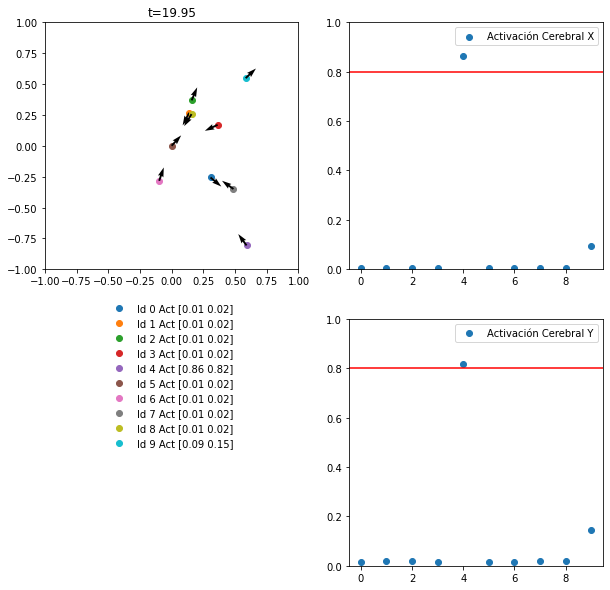

In [13]:
TimeEvolutionPlot(RobotsTesting,t)